In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from utils import plot_images
from image_datasets import load_nist_data
from torchvision.utils import make_grid

def mnist_grid(sample, title=None, num_img=5, nrow=8, figsize=(10,10), save=False):
    _, ax= plt.subplots(1,1, figsize=figsize)
    sample = sample[:num_img]
    img = make_grid(sample, nrow=nrow)
    npimg = np.transpose(img.detach().cpu().numpy(),(1,2,0))
    plt.imshow(npimg)
    ax.set_xlabel(title)
    ax.set_xticks([])
    ax.set_yticks([])
    if save:
        plt.savefig( 'images/' + title + '.png', bbox_inches='tight', dpi=2000)

    plt.show()


def get_10_digits(images, labels):
  digits={}
  for i in range(10):
      digits[i] = images[labels == i]
  digits = torch.cat([
                    digits[1][0],
                    digits[2][0],
                    digits[3][0],
                    digits[4][0],
                    digits[5][0],
                    digits[6][0],
                    digits[7][0],
                    digits[8][0],
                    digits[9][0]
                    ], dim=0)  
  digits = digits.unsqueeze(1)
  return digits

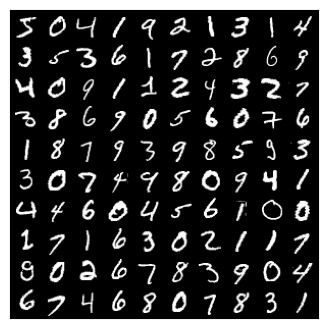

In [18]:
#...Reference dfataset:

data = load_nist_data(name='MNIST')
dataloader = DataLoader(data, batch_size=100, shuffle=False)
images, labels = next(iter(dataloader))
mnist_grid(images, num_img=100, nrow=10, figsize=(4,4))


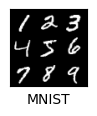

In [19]:
#...Get 10 digits
digits = get_10_digits(images, labels)
mnist_grid(digits, title='MNIST', num_img=9, nrow=3, figsize=(1,1), save=True)

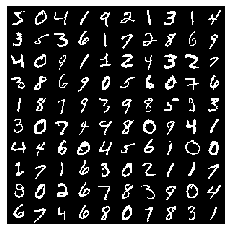

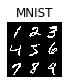

In [16]:

data = load_nist_data(name='BinaryMNIST')
dataloader = DataLoader(data, batch_size=100, shuffle=False)
images, labels = next(iter(dataloader))

digits = get_10_digits(images, labels)
mnist_grid(digits, title='MNIST', num_img=9, nrow=3, figsize=(1,1), save=True)

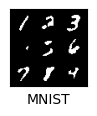

In [33]:
data = load_nist_data(name='BinaryMNIST', distortion='blur', level=1.7)
dataloader = DataLoader(data, batch_size=100, shuffle=False)
images, labels = next(iter(dataloader))
digits = get_10_digits(images, labels)
mnist_grid(digits, title='Blur', num_img=9, nrow=3, figsize=(1,1), save=True)

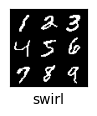

In [30]:
data = load_nist_data(name='BinaryMNIST', distortion='swirl', level=1)
dataloader = DataLoader(data, batch_size=100, shuffle=False)
images, labels = next(iter(dataloader))
digits = get_10_digits(images, labels)
mnist_grid(digits, title='swirl', num_img=9, nrow=3, figsize=(1,1), save=True)

In [ ]:
data = load_nist_data(name='BinaryMNIST', distortion='swirl', level=3)
dataloader = DataLoader(data, batch_size=100, shuffle=False)
images, labels = next(iter(dataloader))
digits = get_10_digits(images, labels)
mnist_grid(digits, title='swirl', num_img=9, nrow=3, figsize=(1,1), save=True)